In [6]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#read dataset
attributes = pd.read_csv('diabetes.csv')
#printing first 5 lines of dataset
attributes.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
#idetify anomalies using describe()
attributes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
#Cleaning up anomalies in data and handling null data
diabetes_data = attributes.copy(deep = True)

diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

In [9]:
#split data into 25%test
from sklearn.model_selection import train_test_split
train_attributes, test_attributes = train_test_split(attributes, test_size=0.25, random_state=0, stratify=attributes['Outcome'])

trainAttr = train_attributes[train_attributes.columns[:8]]
testAttr = test_attributes[test_attributes.columns[:8]]
trainLabel = train_attributes['Outcome']
testLabel = test_attributes['Outcome']

In [10]:
#RandomForest Model Classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
randModel = RandomForestClassifier(n_estimators=100,random_state=0) #n_estimators is number of trees in forest
randModel.fit(train_attributes, trainLabel)
predictedTest = randModel.predict(test_attributes)



In [39]:

print('The accuracy Score is:\n',metrics.accuracy_score(predictedTest,testLabel))

#The model seem to have an accuracy value of 64.06%

The accuracy Score is:
 1.0


In [12]:
#reduce the depth of the tree to 3 levels, instead of the original 100 branch tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import pydot
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_attributes, trainLabel)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Saving feature names for later use
attr_list = list(attributes.columns)
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names= attr_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

In [13]:
from sklearn.metrics import confusion_matrix

print('\n \n The RandomForest confusion matrix: \n', confusion_matrix(predictedTest, testLabel))
print('\n\n The metrics RandomForest classification report:\n ', metrics.classification_report(predictedTest, testLabel))




 
 The RandomForest confusion matrix: 
 [[125   0]
 [  0  67]]


 The metrics RandomForest classification report:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00        67

    accuracy                           1.00       192
   macro avg       1.00      1.00      1.00       192
weighted avg       1.00      1.00      1.00       192



AUC score is:  1.0


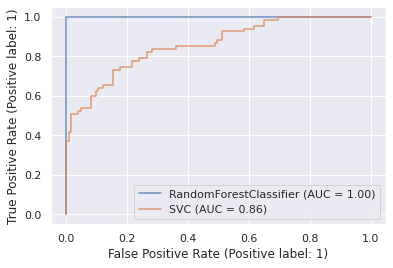

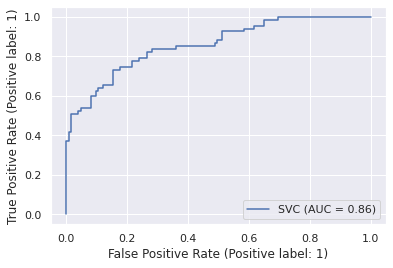

In [28]:
#Area under curve
prob = randModel.predict_proba(test_attributes)
prob = prob[:, 1]

auc = metrics.roc_auc_score(testLabel, prob)
print('AUC score is: ',auc)

#receiver operating characteristic
from sklearn.metrics import plot_roc_curve
from sklearn.svm import SVC
ax = plt.gca()
randModel_disp = plot_roc_curve(randModel, test_attributes, testLabel, ax=ax, alpha=0.8)
svc = SVC(random_state=42)
svc.fit(test_attributes, testLabel)
svc_disp = plot_roc_curve(svc, test_attributes, testLabel)
svc_disp.plot(ax=ax, alpha=0.8)

plt.show()

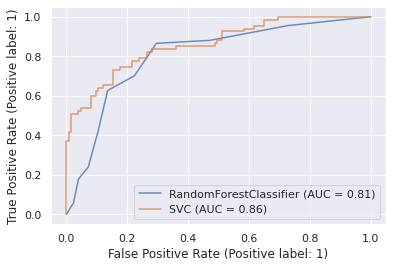

In [35]:

randModel = RandomForestClassifier(n_estimators=10, random_state=42)
randModel.fit(trainAttr, trainLabel)
ax = plt.gca()
randModel_disp = plot_roc_curve(randModel, testAttr, testLabel, ax=ax, alpha=0.8)
svc_disp.plot(ax=ax, alpha=0.8)
plt.show()

KNN Algorithm 


In [15]:
#normalization range 0 and 1, perplexed as to why some data is -2.6, or 1.5
from sklearn.preprocessing import StandardScaler
scale_attr = StandardScaler()
attr = pd.DataFrame(scale_attr.fit_transform(diabetes_data.drop(["Outcome"],axis=1),),
                 columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

attributes_new= attributes.drop('Outcome', axis = 1)
print(scale_attr.transform(attributes_new))
attr.head()

[[ 0.63994726  0.86510807 -0.03351824 ...  0.16661938  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20616153 -0.52985903 ... -0.85219976 -0.36506078
  -0.19067191]
 [ 1.23388019  2.0158134  -0.69530596 ... -1.33250021  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.0225789  -0.03351824 ... -0.910418   -0.68519336
  -0.27575966]
 [-0.84488505  0.14180757 -1.02619983 ... -0.34279019 -0.37110101
   1.17073215]
 [-0.84488505 -0.94314317 -0.19896517 ... -0.29912651 -0.47378505
  -0.87137393]]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [16]:
#from sklearn.preprocessing import StandardScale
#normalize data to calculate euclidean distance for knn algorithm
#if the weightage is not correctly calculated the euclidean distance will be skewed for some data points
from sklearn import preprocessing
a = np.array(attributes)
scaler = preprocessing.StandardScaler()
#transform
standrd = scaler.fit_transform(a)
standrd

ylabel = diabetes_data.Outcome
ylabel

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [17]:
#Test, Train, Validate after splitting data
#split data with test size of 1/3rd of overal data size
from sklearn.model_selection import train_test_split
Attr_train, Attr_test, label_train, label_test = train_test_split(attr,ylabel,test_size=1/3, random_state=42, stratify=ylabel)

In [18]:
#use knn classifier library, datascientist have to provide the value of k
from sklearn.neighbors import KNeighborsClassifier
test_calc = []
train_calc = []
for i in range(1,7):
  knn = KNeighborsClassifier(i)
  #knn.fit(Attr_train, label_train)
  knn.fit(trainAttr, trainLabel)

#need to graphically represent growth
  #train_calc.append(knn.score(Attr_train, label_train))
  #test_calc.append(knn.score(Attr_test, label_test))
  train_calc.append(knn.score(trainAttr, trainLabel))
  test_calc.append(knn.score(testAttr, testLabel))
  test_calc

#score from using same data point for testing and training will be 100
#below you will find score from testing split data points with 1/3 set aside for testing
max_dist_test = max(test_calc)
i_test_calc = [i for i, v in enumerate(test_calc) if v == max_dist_test]
print('Max test score {} % and k = {}'.format(max_dist_test*100, list(map(lambda x: x+1, i_test_calc))))

Max test score 77.60416666666666 % and k = [4, 6]


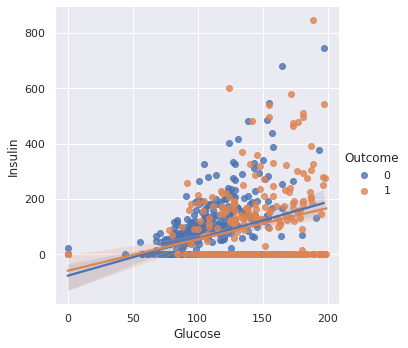

In [19]:
#plot the knn results of test vs train
#below you find mapping insulin, glucose level to outcome of diabetes
import seaborn as sns
sns.set()
sns.lmplot(x="Glucose", y = "Insulin", hue = "Outcome", data=attributes )


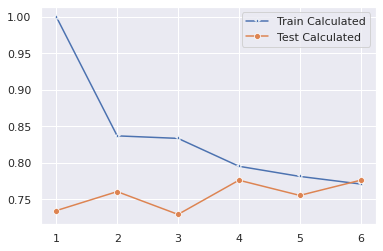

In [20]:
p = sns.lineplot(range(1,7), train_calc, marker='*', label='Train Calculated')
p = sns.lineplot(range(1,7), test_calc, marker='o', label='Test Calculated')

In [22]:
#When enumerating through test data and calculating distance at each i, it can be found that k=3(3 classification) has the best result
knn = KNeighborsClassifier(11)
knn.fit(Attr_train, label_train) #run the model of train data
knn.score(Attr_test, label_test)#test the model on test data allocated(1/3 size)


0.765625

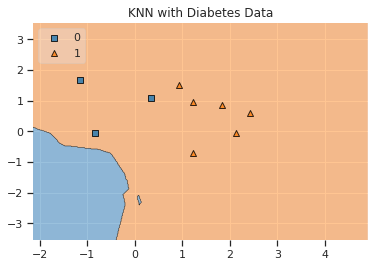

In [23]:
#plot decision boundaries
#add number of attributes you have to filler_feature when plotting decision boundaries
value = 3
width = 3
plot_decision_regions(attr.values, ylabel.values, clf=knn, legend=2,
                      filler_feature_values={2: value, 3: value, 4:value, 5: value, 6:value, 7:value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7:width},
                      X_highlight=test_attributes.values)
plt.title('KNN with Diabetes Data')
plt.show()


In [24]:
#confusion matrix
from sklearn.metrics import confusion_matrix
label_pred = knn.predict(Attr_test)
confusion_matrix(label_test, label_pred)
pd.crosstab(label_test, label_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,142,25,167
1,35,54,89
All,177,79,256


In [25]:
from sklearn.metrics import confusion_matrix

print('\n \n The KNN confusion matrix: \n', confusion_matrix(label_test, label_pred))
print('\n\n The metrics KNN classification report:\n ', metrics.classification_report(label_test, label_pred))




 
 The KNN confusion matrix: 
 [[142  25]
 [ 35  54]]


 The metrics KNN classification report:
                precision    recall  f1-score   support

           0       0.80      0.85      0.83       167
           1       0.68      0.61      0.64        89

    accuracy                           0.77       256
   macro avg       0.74      0.73      0.73       256
weighted avg       0.76      0.77      0.76       256



AUC score is:  0.8193500639171096


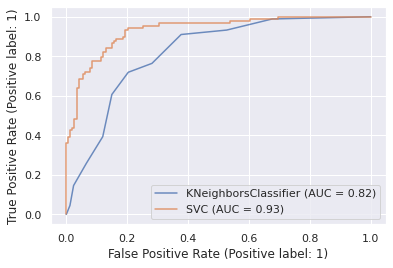

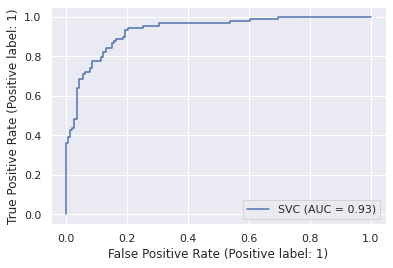

In [40]:
#Area under curve
predictLabel_prob = knn.predict_proba(Attr_test)[:,1]

auc = metrics.roc_auc_score(label_test, predictLabel_prob)
print('AUC score is: ',auc)

#receiver operating characteristic
ax = plt.gca()
knnModel_disp = plot_roc_curve(knn, Attr_test, label_test, ax=ax, alpha=0.8)
svc = SVC(random_state=42)
svc.fit(Attr_test, label_test)
svc_disp = plot_roc_curve(svc, Attr_test, label_test)
svc_disp.plot(ax=ax, alpha=0.8)

DeepLearning Model : LSTM


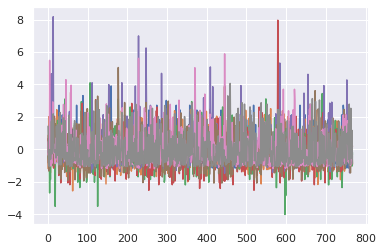

In [97]:
from tensorflow.keras import Sequential
from keras.layers import Dense#, LSTM, GRU, SimpleRNN
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler

lstm_dataset = np.array(attr)
lstm_dataset.reshape(-1,1) #normalizing
plt.plot(lstm_dataset) #visualize



In [98]:
lstm_data=pd.read_excel('timeDiabetes.xlsx')

lstm_data.head(5)

,Date,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2012-03-02 00:00:00,6,148,72,35,0,33.6,0.627,50,1
1,2012-04-01 00:00:00,1,85,66,29,0,26.6,0.351,31,0
2,2012-04-12 00:00:00,8,183,64,0,0,23.3,0.672,32,1
3,2012-04-14 00:00:00,1,89,66,23,94,28.1,0.167,21,0
4,2012-04-21 00:00:00,0,137,40,35,168,43.1,2.288,33,1


In [99]:
lstm_data.describe()
d_data = lstm_data.copy(deep = True)

d_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = d_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
d_data['Glucose'].fillna(d_data['Glucose'].mean(), inplace = True)
d_data['BloodPressure'].fillna(d_data['BloodPressure'].mean(), inplace = True)
d_data['SkinThickness'].fillna(d_data['SkinThickness'].median(), inplace = True)
d_data['Insulin'].fillna(d_data['Insulin'].median(), inplace = True)
d_data['BMI'].fillna(d_data['BMI'].median(), inplace = True)

In [100]:
#split data into 25%test
from sklearn.model_selection import train_test_split
new_dat = lstm_data.drop('Date', axis = 1)
new_dat.head(4)
values = new_dat.values

train_set, test_set = train_test_split(new_dat, test_size=0.25, random_state=0, stratify=new_dat['Outcome'])

trainAttr = train_set[train_set.columns[:8]]
testAttr = test_set[test_set.columns[:8]]
trainLabel = train_set['Outcome']
testLabel = test_set['Outcome']

In [101]:
from sklearn.preprocessing import MinMaxScaler
test_size = len(lstm_data) - int(len(lstm_data) * 0.75) #total size of dataset minus 75% training set size
#trainingset=lstm_data[:int(len(train_set) * 0.75),:]
#testingset=lstm_data[int(len(lstm_data) * 0.75):142,:]

test_values = test_set.values

# ensure all data is float


# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaler_df = MinMaxScaler(feature_range=(0, 1))

scaled = scaler.fit_transform(values)
test_scaled = scaler.fit_transform(test_values)

#df = scaler_df.fit_transform(df1)

# train the training set and test the testing set
train=scaled
test=test_scaled

split= round(len(train)*0.8)

# split into input and outputs
train_X0, train_y0 = train[:split, 1:], train[:split, 0]
val_X0, val_y0 = train[split:,1:], train[split:,0]
test_X0, test_y0 = test[:, 1:], test[:, 0]

train_y=np.asarray(train_y0).reshape(( -1 , 1 ))
val_y=np.asarray(val_y0).reshape(( -1 , 1 ))
test_y=np.asarray(test_y0).reshape(( -1 , 1 ))

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X0.reshape((train_X0.shape[0], 1, train_X0.shape[1]))
val_X = val_X0.reshape((val_X0.shape[0], 1, val_X0.shape[1]))
test_X = test_X0.reshape((test_X0.shape[0], 1, test_X0.shape[1]))



Train X shape:  (614, 1, 8)
Train y shape:  (614, 1)
Validation X shape:  (154, 1, 8)
Validation y shape:  (154, 1)
Test X shape:  (192, 1, 8)
Test y shape:  (192, 1)


In [91]:
#design cnn lstm model
import datetime as dt
from keras.layers import Dense, Activation, Dropout, LSTM, BatchNormalization
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import optimizers
import tensorflow as tf
from sklearn.metrics import mean_squared_error
lstm_model = Sequential()
lstm_model.add(LSTM(5,input_shape=(1,lookback))) #5 neurons of first layer of neural network
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam',run_eagerly=True) #To avoid unexpected result of deepLearnModel.predict() function add run_eagerly
lstm_model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 5)                 140       
                                                                 
 dense_8 (Dense)             (None, 1)                 6         
                                                                 
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


'lstm_model.add(LSTM(units=100, input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True))\nlstm_model.add(LSTM(units=100, return_sequences=False))\nlstm_model.add(Dense(1))\nlstm_model.add(Activation("linear"))\n#adam = tf.keras.optimizers.adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)\nmodel.compile(loss = \'mse\', \n              optimizer = adam)\nmodel.summary()\ncallbacks = [\n        EarlyStopping(monitor=\'val_loss\', patience=8)\n        #ModelCheckpoint(filepath=save_fname, monitor=\'val_loss\', save_best_only=True)\n        ]'

In [96]:
#model is ready for training

lstm_model.build(input_shape=(5, 42))#if you dont build the function before fit it results in the following error: "ValueError: Creating variables on a non-first call to a function decorated with tf.function."
lstm_model.fit(X_train, y_train, epochs=10, batch_size=1) 


Epoch 1/10
574/574 [==============================] - 9s 15ms/step - loss: 0.0453
Epoch 2/10
574/574 [==============================] - 8s 14ms/step - loss: 0.0389
Epoch 3/10
574/574 [==============================] - 8s 14ms/step - loss: 0.0389
Epoch 4/10
574/574 [==============================] - 8s 14ms/step - loss: 0.0390
Epoch 5/10
574/574 [==============================] - 9s 15ms/step - loss: 0.0389
Epoch 6/10
574/574 [==============================] - 8s 14ms/step - loss: 0.0389
Epoch 7/10
574/574 [==============================] - 9s 15ms/step - loss: 0.0389
Epoch 8/10
574/574 [==============================] - 8s 14ms/step - loss: 0.0387
Epoch 9/10
574/574 [==============================] - 8s 15ms/step - loss: 0.0390
Epoch 10/10
574/574 [==============================] - 8s 14ms/step - loss: 0.0389


KeyboardInterrupt: ignored

In [94]:
history = lstm_model.fit(X_train, y_train, epochs=10, batch_size=1) 

                #  , verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title("Loss in LSTM Training")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

Epoch 1/30


ValueError: ignored